## Special Mission - EDA

### Object 
- 마스크를 쓴 사람이미지에 대한 EDA 데이터 시각화

### 분류
- **전체 사람 명 수 :** 4,500  
- **한 사람당 사진의 개수 :** 7  
    [마스크 착용 5장, 이상하게 착용(코스크, 턱스크) 1장, 미착용 1장]
- **이미지 크기 :** (384, 512)

- **Class Description :**  
    마스크 착용여부, 성별, 나이를 기준으로 총 18개의 클래스 
<img src="https://s3-ap-northeast-2.amazonaws.com/aistages-public-junyeop/app/Users/00000025/files/56bd7d05-4eb8-4e3e-884d-18bd74dc4864..png" width="800">

### 경로

- train dataframe  
    - 경로 ` ../input/data/train/train.csv `  
    - 컬럼 : id, gender, race, age, path  
<br>

- images folder  
    - 경로 ` ../input/data/train/images/folder (train dataframe의 path컬럼)/사진7개 `  
    - 레이블링 : incorrect_mask, normal, mask

---


In [15]:
import pandas as pd
import os
from pathlib import Path

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
pd.set_option('display.max_colwidth', 100)

In [4]:
df = pd.DataFrame(None, columns = ['path', 'label'])
train_dir = '../input/data/train/images'
out_path = '../input/data/'

In [5]:
train_dataframe = '../input/data/train/train.csv'

df = pd.read_csv(train_dataframe)
df.head()

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59


In [6]:
"""
0 : 30대 미만 | 1 : 30대 이상 ~ 60대 미만 | 2 : 60대 이상
"""
def age_group(x):
    if x < 30:
        return 0
    elif x < 60:
        return 1
    else:
        return 2

In [14]:
df['age_idx'] = df['age'].apply(lambda x : age_group(x))
df.head(10)

,id,gender,race,age,path,age_idx
0,000001,female,Asian,45,000001_female_Asian_45,1
1,000002,female,Asian,52,000002_female_Asian_52,1
2,000004,male,Asian,54,000004_male_Asian_54,1
3,000005,female,Asian,58,000005_female_Asian_58,1
4,000006,female,Asian,59,000006_female_Asian_59,1
5,000007,female,Asian,58,000007_female_Asian_58,1
6,000008,female,Asian,58,000008_female_Asian_58,1
7,000009,female,Asian,56,000009_female_Asian_56,1
8,000010,female,Asian,58,000010_female_Asian_58,1
9,000012,male,Asian,57,000012_male_Asian_57,1


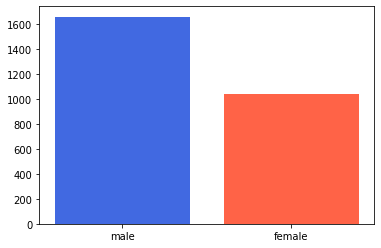

남여 비율
 female    0.614074
male      0.385926
Name: gender, dtype: float64


In [8]:
# gender 분포
fig, axes = plt.subplots(1, 1)
group = df.groupby('gender')
axes.bar(["male","female"], df.groupby('gender').size().to_list(), color=['royalblue','tomato'])
plt.show()

print('남여 비율\n', df.gender.value_counts(1))

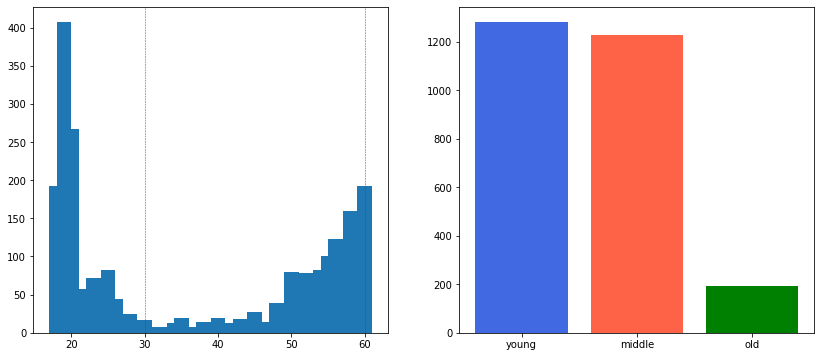

In [12]:
# Age 분포 확인
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].bar(df.groupby(df["age"]).size().index,df.groupby(df["age"]).size().to_list(),width=2)

# Age 범위 분포 확인
axes[1].bar(["young","middle","old"] ,df.groupby(df["age_idx"]).size().to_list(),color=["royalblue","tomato","green"])

# 30살과 60살에 기준선 추가
axes[0].axvline(30, c='red', linestyle='--', linewidth=0.5)
axes[0].axvline(60, c='red', linestyle='--', linewidth=0.5)

plt.show()

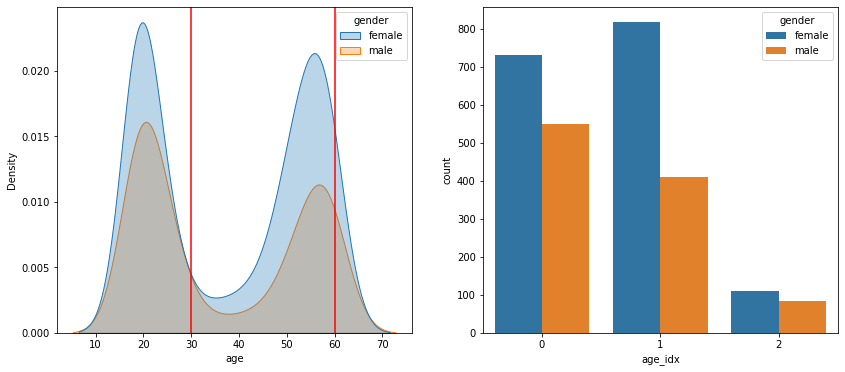

In [10]:
plt.figure(figsize=(14,6))

# 남자와 여자 구분해서, 나이대 분포 확인
plt.subplot(1,2,1)
sns.kdeplot(data=df, x='age', hue='gender', fill=True, alpha=0.3)

# 30살과 60살에 기준선 추가
plt.axvline(30, c='red')
plt.axvline(60, c='red')

# 남녀 구분해서, age_range 분포 확인
plt.subplot(1,2,2)
sns.countplot(data=df, x='age_idx', hue='gender', order=df.age_idx.value_counts().index)

---
## 이미지 시각화

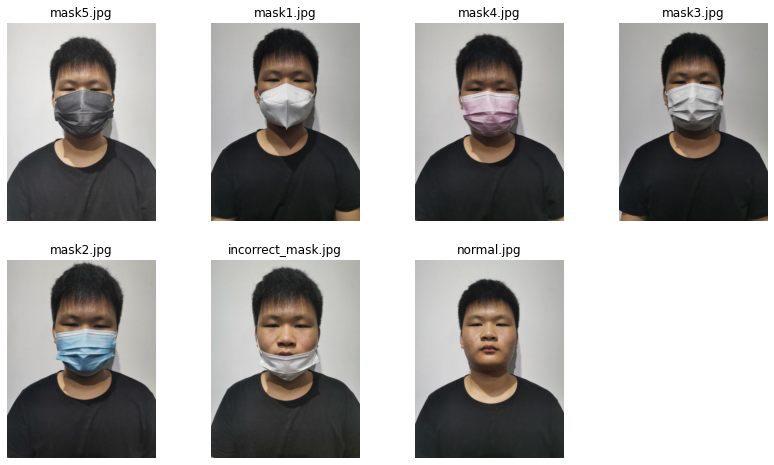

In [32]:
# 이미지 폴더들 디렉토리 위치
img_folder_path = '../input/data/train/images/'

# 샘플로 train dataframe 랜덤 행의 path 컬럼을 가져옴
sample_path = df.sample().path.values[0]

# sample_img_path : 실제 이미지 데이터가 있는 경로
sample_img_path = os.listdir(os.path.join(img_folder_path, sample_path))
# sample_img_path

# # '._'로 시작하는 파일은 필터링 거쳐서 진짜 필요한 7개 데이터만 가져옴 -> sample_img_path_real append함
sample_img_path_real = []
for i in sample_img_path:
    if '._' not in i:
        sample_img_path_real.append(i)
# sample_img_path_real

# 샘플 이미지 7개를 plt로 시각화
plt.figure(figsize=(14,8))
for idx, i in enumerate(sample_img_path_real):
    plt.subplot(2, 4, idx+1)
    imgs = os.path.join(img_folder_path, sample_path, i)

    image_pil = Image.open(imgs)
    image = np.array(image_pil)

    plt.imshow(image)
    plt.title(i)
    plt.axis('off')